In [1]:
%pylab inline

import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fmt

Populating the interactive namespace from numpy and matplotlib


# Homework Set 1

## Problem 0:

I have read and understood the [class policy]( https://nbviewer.jupyter.org/github/yadongli/nyumath2048/blob/master/ClassPolicies.ipynb), especially the section about cheating. Please type your full names below to acknowledge:

### Full name: Zepeng Xiao

## Problem 1:

Set up your Python and IPython notebook environment and show case the following IPython functionalities:

2. use ? or help() to show comments (docstring) of a python function
3. use %pdb to debug the following code, show how to print out the value of b inside function bug() using the debugger

In [2]:
from platform import python_version
python_version()

'3.6.8'

### Problem 1 Solution:

In [3]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



2. <br>

The comments of the builtin python function $\textbf{\len()}$ is showed above. <br>

For example: $\quad \text{len([1, 2, 3])} \ \to 3$

In [5]:
%pdb on 

def div(a, b) :
    return a/b

def bug(a, b) :
    return div(a, b)

bug(3, 0)

Automatic pdb calling has been turned ON


ZeroDivisionError: division by zero

> <ipython-input-5-2030d3688080>(4)div()
      2 
      3 def div(a, b) :
----> 4     return a/b
      5 
      6 def bug(a, b) :

ipdb> up
> <ipython-input-5-2030d3688080>(7)bug()
      5 
      6 def bug(a, b) :
----> 7     return div(a, b)
      8 
      9 bug(3, 0)

ipdb> display b
display b: 0
ipdb> q


3. <br>

To print out the value of b inside function bug() using the debugger: <br>

(1) Execute $\textbf{up}$ to make the frame point to the line "return div(a, b)", which is in the body of $\textbf{bug()}$.

(2) Execute $\textbf{display b}$ to print out the value of b, we know that $b = 0$.

## Problem 2:

For the first term of the conditional variance expression of the CIR process discused in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double or single precision calculation?  

### Problem 2 Solution:

In [6]:
# Compute the condition number of f(kappa)
r, s, k, t = sp.symbols('r, s, k, t')
f = (r*s**2/k)*(sp.exp(-k*t) - sp.exp(-2*k*t))
condF = sp.simplify(abs(f.diff(k)*k/f))
condF

Abs((k*t*(exp(k*t) - 2) + exp(k*t) - 1)/(exp(k*t) - 1))

In [7]:
# Compute the condition number of f(kappa) when kappa = 0
sp.limit(condF, k, 0)

0

In [8]:
# Find the expression of f(kappa) when kappa = 0
sp.limit(f, k, 0)

r*s**2*t

In [9]:
# Find the expression of f(kappa) / f''(kappa)
# and compute the value when kappa = 0, to compute optimal bump size h
g = sp.simplify(f/(f.diff(k)).diff(k))
sp.limit(g, k, 0)

3/(7*t**2)

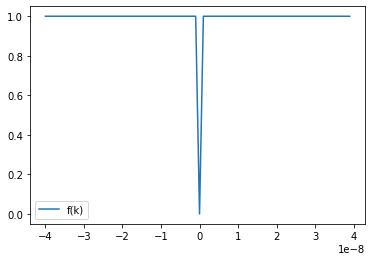

In [10]:
# To simplify the calculation, set all other variables be 0
# i.e, r0 = 1, sigma = 1, t = 1
r0, sigma, t = 1, 1, 1

# define f(kappa) to make plots
def f(k):
    return (r0 * sigma**2 / k)*(exp(-k*t) - exp(-2*k*t))

# Plot the result, the curve of f(kappa) 
kRange = np.arange(-4e-8, 4e-8, 1e-9)
df = pd.DataFrame(np.array([f(kRange)]).T, index = kRange, columns=['f(k)'])
df.plot()

1. <br>

$\displaystyle f(\kappa) = \frac{r_0 \sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t}) \Rightarrow \frac{df}{d\kappa} = -\frac{r_0 \sigma^2}{\kappa^2}(e^{-\kappa t} - e^{-2\kappa t}) + \frac{r_0 \sigma^2}{\kappa}(- te^{-\kappa t} + 2te^{-2\kappa t}) = \frac{r_0 \sigma^2}{\kappa}[(2t+\frac{1}{\kappa})e^{-2\kappa t} - (t+\frac{1}{\kappa})e^{-\kappa t}]$ <br>

$\displaystyle \Rightarrow k(f) = |\frac{\kappa}{f}\frac{df}{d\kappa}| = |\frac{\kappa}{\frac{r_0 \sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})}\frac{r_0 \sigma^2}{\kappa}[(2t+\frac{1}{\kappa})e^{-2\kappa t} - (t+\frac{1}{\kappa})e^{-\kappa t}]| = |\frac{(2\kappa t + 1)e^{-2\kappa t} - (\kappa t + 1)e^{-\kappa t}}{e^{-\kappa t} - e^{-2\kappa t}}| = |-2\kappa t - 1 + \frac{\kappa t e^{-\kappa t}}{e^{-\kappa t} - e^{-2\kappa t}}|$ <br>

$\displaystyle \lim_{\kappa \to 0}\frac{\kappa t e^{-\kappa t}}{e^{-\kappa t} - e^{-2\kappa t}} = \lim_{\kappa \to 0}\frac{t e^{-\kappa t} - \kappa t^2 e^{-\kappa t}}{-te^{-\kappa t} + 2te^{-2\kappa t}} = 1 \Rightarrow \lim_{\kappa \to 0}k(f) = \lim_{\kappa \to 0}|-2\kappa t - 1 + \frac{\kappa t e^{-\kappa t}}{e^{-\kappa t} - e^{-2\kappa t}}| = 0$ <br>

Hence the condition number of $f(\kappa)$ is $\displaystyle |-2\kappa t - 1 + \frac{\kappa t e^{-\kappa t}}{e^{-\kappa t} - e^{-2\kappa t}}|$, and when $\kappa = 0$, the condition number is zero, it is well-posed.

However, as the plot showed above, we can conclude that the computation is not stable around $\kappa = 0$ though it is well-posed.

Machine epsion for double precision is: 2.220446049250313e-16 and optimal bump size is: 1.3795794543214909e-08
Machine epsion for single precision is: 1.1920929e-07 and optimal bump size is: 0.00031965511265037944


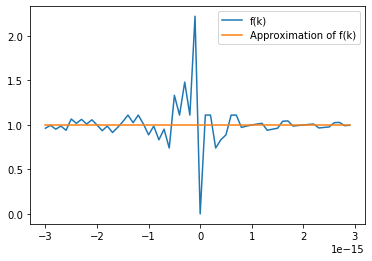

In [11]:
# Find machine epsilon and optimal bump size h* 
# for single precision and double precision separately
singleEpsilon = np.finfo(float32).eps
doubleEpsilon = np.finfo(float).eps
# Use the expression of f(kappa) / f''(kappa) mentioned above
hSingle = np.sqrt(2 * singleEpsilon * 3 / (7 * t**2))
hDouble = np.sqrt(2 * doubleEpsilon * 3 / (7 * t**2))

# Print results
print("Machine epsion for double precision is:", doubleEpsilon, "and optimal bump size is:", hDouble)
print("Machine epsion for single precision is:", singleEpsilon, "and optimal bump size is:", hSingle)

# Use the expreesion mentioned above to compute f(kappa = 0)
fZero = r0 * sigma**2 * t

# Deifne approximation function by applying finite-difference method
def fApprox(k):
    slope = (f(hDouble) - fZero) / (hDouble)
    return k * slope + fZero

# Plot the result, the curve of f(kappa) and approximation of f(kappa)
kRangeDouble = np.arange(-3e-8, 3e-8, 1e-9)*1e-7
df1 = pd.DataFrame(np.array([f(kRangeDouble), fApprox(kRangeDouble)]).T, 
                   index = kRangeDouble , columns=['f(k)', 'Approximation of f(k)'])
df1.plot();

2. <br> 

As the code showed above, we can do the approximation by forward difference method. <br>
When $\kappa$ is around zero, we can approximate $f(\kappa)$ by $f(\kappa) = f(0) + \kappa*f'(h)$ where $h$ is the optimal bump size.
From lecture, we know that $h = \sqrt{\displaystyle \frac{2f(\kappa)\epsilon_m}{f^{''}(\kappa)}}$ for forward difference, and we can compute by sympy that $\displaystyle \lim_{\kappa \to 0}\frac{f(\kappa)}{f^{''}(\kappa)} = \frac{3}{7t^2}$ <br>

Hence we can find the threshold $h$. When $t = 1$, $h = \sqrt{\displaystyle \frac{6\epsilon_m}{7t^2}}$, and compute $f'(h)$ by $\displaystyle \frac{f(h) - f(0)}{h}$. <br>

Note that double precision and single presicion has different $\epsilon_m$, hence $h$ is different for double and single precision calculation. <br>
For double precision: $\epsilon_m$ is 2.220446049250313e-16 and $h$ is 1.3795794543214909e-08. <br>
For single precision: $\epsilon_m$ is 1.1920929e-07 and $h$ is 0.00031965511265037944.

## Problem 3:

Implement a matrix product function using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix production is ```a.dot(b)```, for matrix type, the matrix production is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is to use ```a*b``` for matrix production on array type. Please see the following code section as an example.
* numpy.allclose is a useful function to compare floating point calculation results


### Problem 3 Solution:

In [12]:
#Implement a matrix product function using hand coded loops
#Input:
#  M1: first matrix
#  M2: second matrix
#Output:
#  result: the matrix multiplication of (M1 x M2)
def matrixMul(M1, M2):
    # Initialize the result matrix, determine its row and column
    resultRow = len(M1)
    resultCol = len(M2[0])
    result = np.zeros((resultRow, resultCol))
    # Do numpy array multiplications for each entry in result matrix
    for i in range(resultRow):
        for j in range(resultCol):
            array1 = M1[i]
            array2 = M2[:,j]
            result[i][j] = array1.dot(array2)
    return result

Text(0, 0.5, 'Time Difference (s)')

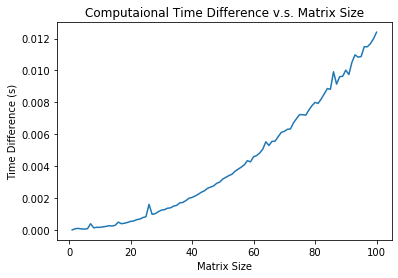

In [13]:
import time

# Set 
dim = np.arange(1, 101)
handLoopTime = np.zeros(100)
numpyTime = np.zeros(100)

# Recording 
for i in range(100):
    d = dim[i]
    M1 = np.arange(1, d ** 2 + 1).reshape(d, d)
    M2 = M1 + 1
    
    handStart = time.clock()
    handResult = matrixMul(M1, M2)
    handEnd = time.clock()
    handLoopTime[i] = handEnd - handStart
    
    numpyStart = time.clock()
    numpyResult = np.matmul(M1, M2)
    numpyEnd = time.clock()
    numpyTime[i] = numpyEnd - numpyStart
    
    assert(np.allclose(handResult, numpyResult))

# Plot results
#plt.plot(dim, handLoopTime, label = 'computational time by hand coded loops')
#plt.plot(dim, numpyTime, label = 'computational time by numpy matrix product')
plt.plot(dim, handLoopTime - numpyTime)
plt.title('Computaional Time Difference v.s. Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Time Difference (s)')

The plot of difference in computational time with the size of the matrix, between my hand coded loop matrix multiplication method and numpy method is showed above. For matrix multiplication, hand coded loop method always takes more time than numpy method. <br>

We may conclude that the time difference $dt$ is positive correlated with the size of matrix $n$, which means that as matrix size increases, applying hand coded loop method will waste more time, comparing with applying numpy method.

Also, it seems that $dt \propto n^a$, where $a \in (2, 3)$.

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a + 1
print("a=\n", a)
print("\nb=\n", b)
c = a.dot(b) # matrix product
d = a*b #elment wise multiplication

print("\nc=a.dot(b)\n", c)
print("\nd=a*b\n", d)

## Book problems (from Goodman and Bindel Book)

### 2.8

Hint: 

* The extra credit part of this problem is rather involved, you are encouraged to try but there is no need to spend too much time.
* In python, floating point numbers are double precision by default, but you can force them to be single precision by calling numpy.float32, please see the following example:

### Book Problem 2.8 Solution:

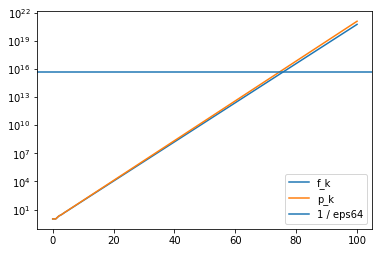

In [14]:
# Works for double precision in part(a)

# Set f0 = p0 = 0, f1 = p1 = 1
f0_64, p0_64 = np.float64(1.), np.float64(1.)
f1_64, p1_64 = np.float64(1.), np.float64(1.)
c64 = np.float64(1 + sqrt(3) / 100) # c to compute p_k

# Set the index of f and p
k = np.arange(101)
# Initialize the npArray to store f_k and p_k
fArray64, pArray64 = np.zeros(101), np.zeros(101)
fArray64[0], fArray64[1] = f0_64, f1_64
pArray64[0], pArray64[1] = p0_64, p1_64

# Compute f_k and p_k
for i in range(1, 100):
    fArray64[i + 1] = np.float64(fArray64[i] + fArray64[i - 1])
    pArray64[i + 1] = np.float64(c64 * pArray64[i] + pArray64[i - 1])

# Plot results
plt.plot(k, fArray64, label = "f_k")
plt.plot(k, pArray64, label = "p_k")
plt.axhline(np.float64(1 / doubleEpsilon), label = "1 / eps64")
plt.yscale("log")
plt.legend(loc = 4)

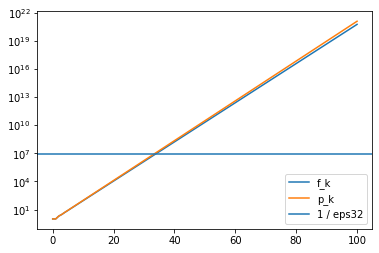

In [15]:
# Works for single precision in part(a)

# Set f0 = p0 = 1, f1 = p1 = 1
f0_32, p0_32 = np.float32(1.), np.float32(1.)
f1_32, p1_32 = np.float32(1.), np.float32(1.)
c32 = np.float32(1 + sqrt(3) / 100) # c to compute p_k

# Set the index of f and p
k = np.arange(101)
# Initialize the npArray to store f_k and p_k
fArray32, pArray32 = np.zeros(101), np.zeros(101)
fArray32[0], fArray32[1] = f0_32, f1_32
pArray32[0], pArray32[1] = p0_32, p1_32

# Compute f_k and p_k
for i in range(1, 100):
    fArray32[i + 1] = np.float32(fArray32[i] + fArray32[i - 1])
    pArray32[i + 1] = np.float32(c32 * pArray32[i] + pArray32[i - 1])

# Plot results
plt.plot(k, fArray32, label = "f_k")
plt.plot(k, pArray32, label = "p_k")
plt.axhline(np.float32(1 / singleEpsilon), label = "1 / eps32")
plt.yscale("log")
plt.legend(loc = 4)

(a) <br>
The plot of $f_n$ and $p_n$ separately computed by single precision and double precision are showed above, blue horizontal line refers to $1/\epsilon_m$ for different precision.

The beginning value n results in no accuracy for the recomputed f0_hat in double precision is: 78 .
The beginning value n results in no accuracy for the recomputed f0_hat in single precision is: 36 .


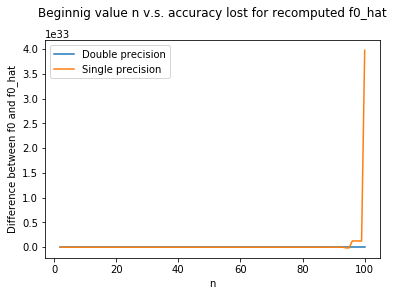

In [16]:
# Works for part(b)

n = np.arange(2, 101)

# Double precision
f0Hat64 = np.zeros(99) # The npArray to store recomputed f0_hat
fRes64 = -1 # The value n where accuracy lost for f0_hat
# Loop to recompute f0_hat by each n from 2 to 101
for i in range(2, 101):
    # Initialize npArray to recompute f0_hat from f_i
    fArrayRev64 = np.zeros(i + 1)
    fArrayRev64[-1], fArrayRev64[-2] = fArray64[i], fArray64[i - 1]
    # Loop to recompute f0_hat
    for j in range(i - 1, 0, -1):
        fArrayRev64[j - 1] = np.float64(fArrayRev64[j + 1] - fArrayRev64[j])
    # Record recomputed f0_hat from f_i
    f0Hat64[i - 2] = fArrayRev64[0]
    
    # Record the value n where accuracy lost for f0_hat
    if (fArrayRev64[0] != fArray64[0] and fRes64 == -1):
        fRes64 = i

#Single precision
f0Hat32 = np.zeros(99) # The npArray to store recomputed f0_hat
fRes32 = -1 # The value n where accuracy lost for f0_hat
# Loop to recompute f0_hat by each n from 2 to 101
for i in range(2, 101):
    # Initialize npArray to recompute f0_hat from f_i
    fArrayRev32 = np.zeros(i + 1)
    fArrayRev32[-1], fArrayRev32[-2] = fArray32[i], fArray32[i - 1]
    # Loop to recompute f0_hat
    for j in range(i - 1, 0, -1):
        fArrayRev32[j - 1] = np.float32(fArrayRev32[j + 1] - fArrayRev32[j])
    # Record recomputed f0_hat from f_i
    f0Hat32[i - 2] = fArrayRev32[0]
    
    # Record the value n where accuracy lost for f0_hat
    if (fArrayRev32[0] != fArray32[0] and fRes32 == -1):
        fRes32 = i
    
# Plot and print results
print("The beginning value n results in no accuracy for the recomputed f0_hat in double precision is:", fRes64, ".")
print("The beginning value n results in no accuracy for the recomputed f0_hat in single precision is:", fRes32, ".")
plt.plot(n, f0Hat64, label = "Double precision")
plt.plot(n, f0Hat32, label = "Single precision")
plt.title("Beginnig value n v.s. accuracy lost for recomputed f0_hat", y = 1.08)
plt.xlabel('n')
plt.ylabel('Difference between f0 and f0_hat')
plt.legend()

(b) <br>
The plot for the difference between the original $f_0 = 1$ and the recomputed $\hat{f_0}$ as a function of $n$ is showed above. <br>
From the results showed above, we know that for double preciison, no accuracy for $\hat{f_0}$ happens when $n \geq 78$, and for single precision, $n \geq 36$. <br>
The accuracy lost faster for single precision since the relative error of representing a real number by single precision is more than double precision. And more relative error will be happened if doing calculation for two real numbers by representing single precision, so the lost of accuracy accumulate faster.

The beginning value n results in no accuracy for the recomputed p0_hat in double precision is: 6 .
The beginning value n results in no accuracy for the recomputed p0_hat in single precision is: 2 .


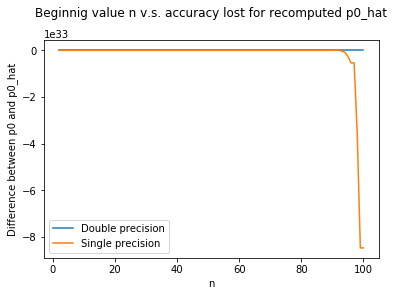

In [17]:
# Works for part(c)

# Double precision
p0Hat64 = np.zeros(99) # The npArray to store recomputed p0_hat
pRes64 = -1 # The value n where accuracy lost for p0_hat
# Loop to recompute p0_hat by each n from 2 to 101
for i in range(2, 101):
    # Initialize npArray to recompute p0_hat from p_i
    pArrayRev64 = np.zeros(i + 1)
    pArrayRev64[-1], pArrayRev64[-2] = pArray64[i], pArray64[i - 1]
    # Loop to recompute p0_hat
    for j in range(i - 1, 0, -1):
        pArrayRev64[j - 1] = np.float64(pArrayRev64[j + 1] - c64 * pArrayRev64[j])
    # Record recomputed p0_hat from p_i
    p0Hat64[i - 2] = pArrayRev64[0]
    
    # Record the value n where accuracy lost for p0_hat
    if (pArrayRev64[0] != pArray64[0] and pRes64 == -1):
        pRes64 = i

#Single precision
p0Hat32 = np.zeros(99) # The npArray to store recomputed p0_hat
pRes32 = -1 # The value n where accuracy lost for p0_hat
# Loop to recompute p0_hat by each n from 2 to 101
for i in range(2, 101):
    # Initialize npArray to recompute p0_hat from p_i
    pArrayRev32 = np.zeros(i + 1)
    pArrayRev32[-1], pArrayRev32[-2] = pArray32[i], pArray32[i - 1]
    # Loop to recompute p0_hat
    for j in range(i - 1, 0, -1):
        pArrayRev32[j - 1] = np.float32(pArrayRev32[j + 1] - c32 * pArrayRev32[j])
    # Record recomputed p0_hat from p_i
    p0Hat32[i - 2] = pArrayRev32[0]
    
    # Record the value n where accuracy lost for p0_hat
    if (pArrayRev32[0] != pArray32[0] and pRes32 == -1):
        pRes32 = i

# Plot and print results
print("The beginning value n results in no accuracy for the recomputed p0_hat in double precision is:", pRes64, ".")
print("The beginning value n results in no accuracy for the recomputed p0_hat in single precision is:", pRes32, ".")
plt.plot(n, p0Hat64, label = "Double precision")
plt.plot(n, p0Hat32, label = "Single precision")
plt.title("Beginnig value n v.s. accuracy lost for recomputed p0_hat", y = 1.08)
plt.xlabel('n')
plt.ylabel('Difference between p0 and p0_hat')
plt.legend()

(c) <br>
The plot for the difference between the original $p_0 = 1$ and the recomputed $\hat{p_0}$ as a function of $n$ is showed above. From the results showed above, we know that for double preciison, no accuracy for $\hat{p_0}$ happens when $n \geq 6$, and for single precision, $n \geq 2$. <br>
The striking difference in the way precision is lost between $f$ and $p$ is because we have $c = 1 + \sqrt{3}/100$ when computing $\hat{p_0}$, $\sqrt{3}/100$ is a small number and will cause unavoidable relative error when representing it by floating number(also greater error by single precision). Hence the lost of accuracy for $p$ accumulate much more faster than $f$.

Extra Credit:

I guess that the order of magnitude of the error in recomputing $p_0$ where $p_{k - 1} = p_{k + 1} - p_k$ is proportional to the order of $\displaystyle \frac{1}{(c - 1)\epsilon_{m}}$.

In [ ]:
a = np.float32(1.)
b = np.float64(1.)

print(type(a), type(b))